# **Edward's Notebook**


Police Facility Count by Police Zone:
  police_zone  police_station_count
0         5.0                     6
1         2.0                     5
2         1.0                     4
3         6.0                     1
4         3.0                     1
5         4.0                     1

Arrest Count by Neighborhood:
                neighborhood  arrest_count
0  central business district          4440
1           south side flats          3497
2                        nan          2489
3                    carrick          2352
4             east allegheny          2217

Arrest Data with Mapped Police Zone (first 10 rows):
                 neighborhood  arrest_count police_zone
0   central business district          4440         2.0
1            south side flats          3497         3.0
3                     carrick          2352         3.0
4              east allegheny          2217         1.0
5              homewood south          2090         5.0
6              homewood north 

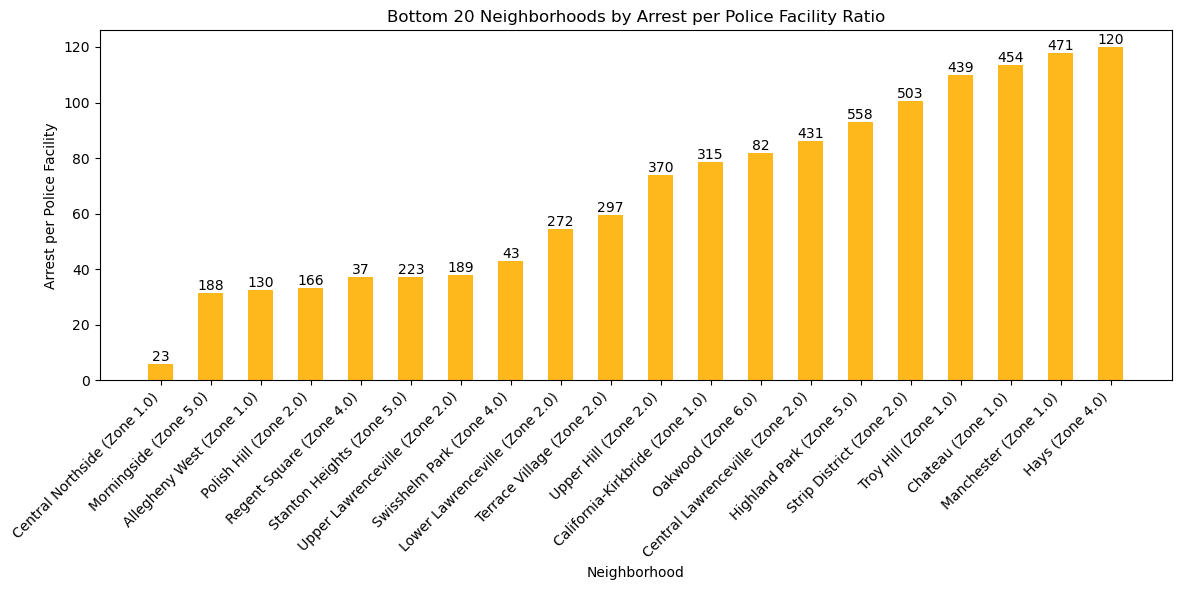

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

facilities_df = pd.read_csv("City Facilities.csv")

mapping_df = facilities_df[['neighborhood', 'police_zone']].dropna().drop_duplicates(subset=['neighborhood'])

mapping_df['neighborhood'] = mapping_df['neighborhood'].astype(str).str.strip().str.lower()
mapping_df['police_zone'] = mapping_df['police_zone'].astype(str).str.strip().str.lower()

neighborhood_to_zone = mapping_df.set_index('neighborhood')['police_zone'].to_dict()

police_facilities = facilities_df[facilities_df["name"].str.contains("police", case=False, na=False)].copy()
police_facilities['police_zone'] = police_facilities['police_zone'].astype(str).str.strip().str.lower()

police_station_counts = police_facilities["police_zone"].value_counts().reset_index()
police_station_counts.columns = ["police_zone", "police_station_count"]
print("\nPolice Facility Count by Police Zone:")
print(police_station_counts)

arrest_df = pd.read_csv("Police Arrest Data.csv")
arrest_df['INCIDENTNEIGHBORHOOD'] = arrest_df['INCIDENTNEIGHBORHOOD'].astype(str).str.strip().str.lower()

arrest_by_neighborhood = arrest_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_by_neighborhood.columns = ["neighborhood", "arrest_count"]
print("\nArrest Count by Neighborhood:")
print(arrest_by_neighborhood.head())

arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['neighborhood'].map(neighborhood_to_zone)
arrest_by_neighborhood = arrest_by_neighborhood.dropna(subset=['police_zone'])
arrest_by_neighborhood['police_zone'] = arrest_by_neighborhood['police_zone'].astype(str).str.strip().str.lower()

print("\nArrest Data with Mapped Police Zone (first 10 rows):")
print(arrest_by_neighborhood.head(10))

merged_neighborhood = pd.merge(arrest_by_neighborhood, police_station_counts,
                               left_on='police_zone', right_on='police_zone', how='inner')

merged_neighborhood['arrest_per_station'] = merged_neighborhood['arrest_count'] / merged_neighborhood['police_station_count']

print("\nMerged Data (by Neighborhood):")
print(merged_neighborhood)

bottom20 = merged_neighborhood.sort_values("arrest_per_station", ascending=True).head(20)
x = np.arange(len(bottom20))
bar_width = 0.5

plt.figure(figsize=(12, 6))
bars = plt.bar(x, bottom20["arrest_per_station"], width=bar_width, color='#FFB81C')

plt.xlabel("Neighborhood")
plt.ylabel("Arrest per Police Facility")
plt.title("Bottom 20 Neighborhoods by Arrest per Police Facility Ratio")

labels = [f"{row['neighborhood'].title()} (Zone {row['police_zone'].upper()})" for _, row in bottom20.iterrows()]
plt.xticks(x, labels, rotation=45, ha="right")

for i, bar in enumerate(bars):
    height = bar.get_height()
    abs_arrest = int(bottom20["arrest_count"].iloc[i])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{abs_arrest}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

**Data Ingestion & Cleaning**

Loaded the City Facilities and Police Arrest Data CSVs.

Standardized neighborhood and zone names (lowercase, trimmed) to ensure accurate joins.

**Mapping & Aggregation**

Created a neighborhood → police_zone lookup from the facilities data.

Counted the number of police facilities in each zone.

Tallied total arrests by neighborhood and mapped them to their zones.

**Metric Calculation**

Merged facility counts with arrest totals.

Computed Arrests per Police Facility:

**Arrests per Facility**

Total Arrests
Number of Police Facilities
Arrests per Facility= 
Number of Police Facilities
Total Arrests
​
 
A lower ratio indicates fewer arrests relative to policing resources—a proxy for greater safety.

**Visualization**

Plotted the Bottom 20 neighborhoods by this ratio, labeling each bar with its raw arrest count.

This chart makes it easy to spot areas like Central Northside that combine ample police coverage with very low arrest figures.

By normalizing arrests to station counts, the code moves beyond raw incident tallies and reveals which neighborhoods truly benefit from effective, proportional policing. This approach underpinned our selection of Central Northside as the safest neighborhood in Pittsburgh and can be readily adapted to other safety-related metrics or different cities.

**Conclusion**

By integrating city‐facility and arrest data, we standardized neighborhood and zone names, mapped each neighborhood to its police zone to count station presence, and tallied arrests per area. We then calculated an “arrests per police facility” ratio to normalize crime levels against policing resources and visualized the twenty neighborhoods with the lowest ratios. This process highlighted Central Northside—an area combining substantial police coverage with very few arrests—as the safest under our metric, demonstrating how adjusting for facility counts yields a more meaningful comparison of neighborhood safety than raw arrest totals alone.